# License Plates Recognition

Ivan Martín Campoy (NIU), Aina Navarro Ràfols (1670797), Sara Martín Núñez (1669812)

# _Part III: Optical Character Recognition - Support Vector Machines (SVM)_

### Libraries and general functions

In [4]:
import joblib
import os
from sklearn.svm import SVC
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# preprocessing the image for the SVM
def preprocess_image_svm(image_path):
    char_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    char_image = cv2.resize(char_image, (20, 20))  # Resize to match the training size
    char_image_flattened = char_image.flatten()
    return char_image_flattened

## Plate Recognition using two SVM

### Creation of the datasets

Function to obtain our dataset of the folder SVMs

In [18]:
ALLOWED_LETTERS = 'BCDFGHJKLMNPRSTVWXYZ'
DIGITS = '0123456789'

# Function to load images and labels
def load_data(folder_path, classes):
    train_data = []  # List to store feature vectors (flattened images)
    train_labels = []  # List to store labels (corresponding letters/numbers)
    
    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(".jpg"):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
                img = cv2.resize(img, (20, 20))
                img_flattened = img.flatten()  # Flatten image to 1D vector
                train_data.append(img_flattened)
                train_labels.append(class_name)  # Append the label (class name)
    
    return np.array(train_data), np.array(train_labels)

Obtaining the training data of the digits

In [19]:
# Paths to the digit and letter folders
digit_folder_path = "SVMs/Digits"

# Load digit data
X_digits, y_digits = load_data(digit_folder_path, DIGITS)

# Split datasets into training and testing sets
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

Obtaining the training data of the letters

In [20]:
letter_folder_path = "SVMs/Letters"

# Load letter data
X_letters, y_letters = load_data(letter_folder_path, ALLOWED_LETTERS)

# Split datasets into training and testing sets
X_letters_train, X_letters_test, y_letters_train, y_letters_test = train_test_split(X_letters, y_letters, test_size=0.2, random_state=42)

In [21]:
# Printing some information about the datasets

print(f' DIGITS DATASET')
print(f'Training data shape: {X_digits.shape}')
print(f"Number of unique classes: {len(np.unique(y_digits))}")
print(f"Classes: {np.unique(y_digits)}")



print(f'\n LETTERS DATASET')
print(f'Training data shape: {X_letters.shape}')
print(f"Number of unique classes: {len(np.unique(y_letters))}")
print(f"Classes: {np.unique(y_letters)}")

 DIGITS DATASET
Training data shape: (10300, 400)
Number of unique classes: 10
Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

 LETTERS DATASET
Training data shape: (20150, 400)
Number of unique classes: 20
Classes: ['B' 'C' 'D' 'F' 'G' 'H' 'J' 'K' 'L' 'M' 'N' 'P' 'R' 'S' 'T' 'V' 'W' 'X'
 'Y' 'Z']


### Creation of the SVMs models

In [23]:
ocr_models = "OCR_models/SVM"

kernels = ["linear", "rbf", "poly", "sigmoid"]

for ker in kernels:
    #  Train SVM for digits
    svm_digits = SVC(kernel=ker, C=1.0)
    svm_digits.fit(X_digits_train, y_digits_train)

    file_digits = f'{ker}_svm_digits.pkl'
    #save the model
    path_digits_ocr = os.path.join(ocr_models, file_digits)
    joblib.dump(svm_digits, path_digits_ocr)



    # Train SVM for letters
    svm_letters = SVC(kernel=ker, C=1.0)
    svm_letters.fit(X_letters_train, y_letters_train)


    file_letters = f'{ker}_svm_letters.pkl'
    #save the model
    path_letters_ocr = os.path.join(ocr_models, file_letters)
    joblib.dump(svm_letters, path_letters_ocr)

### Validation

In [24]:
def calculate_accuracies_numbers(y_test, y_pred):
    # Initialize counters
    correct_numbers = 0
    total_numbers = 0

    # Loop through each test example
    for actual, predicted in zip(y_test, y_pred):
        total_numbers += 1
        if actual == predicted:
            correct_numbers += 1


    # Calculate accuracies
    number_accuracy = (correct_numbers / total_numbers) * 100 if total_numbers > 0 else 0

    return number_accuracy


# Predict labels for the test set
y_digits_pred = svm_digits.predict(X_digits_test)

# Calculate accuracies
number_accuracy = calculate_accuracies_numbers(y_digits_test, y_digits_pred)

# Print accuracies
print(f"Number-Level Accuracy: {number_accuracy:.2f}%")


Number-Level Accuracy: 15.00%


In [25]:
def calculate_accuracies_numbers(y_test, y_pred):
    # Initialize counters
    correct_letters = 0
    total_letters = 0

    # Loop through each test example
    for actual, predicted in zip(y_test, y_pred):
        total_letters += 1
        if actual == predicted:
            correct_letters += 1


    # Calculate accuracies
    letter_accuracy = (correct_letters / total_letters) * 100 if total_letters > 0 else 0

    return letter_accuracy


# Predict labels for the test set
y_letters_pred = svm_letters.predict(X_letters_test)

# Calculate accuracies
letter_accuracy = calculate_accuracies_numbers(y_letters_test, y_letters_pred)

# Print accuracies
print(f"Letter-Level Accuracy: {letter_accuracy:.2f}%")


Letter-Level Accuracy: 7.97%


In [26]:
char_accuracy = (number_accuracy + letter_accuracy) / 2
print(f'Character-level Accuracy: {char_accuracy:.2f}%')

Character-level Accuracy: 11.48%


### Prediction functions

In [27]:
#function to visualize the full plate prediction with the ground truth
def visualize_full_plate_two_svm(plate_image_path, plate_type, predicted_plate, actual_plate):
    img = cv2.imread(plate_image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError(f"Could not load the image at {plate_image_path}")
    
    # Create a directory path 
    save_dir = f'OCR_results/SVM'
    
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)
    
    # Construct the save path
    plate_filename = os.path.basename(plate_image_path).replace('.jpg', '').replace('.png', '')  # Remove file extensions
    save_path = os.path.join(save_dir, f'svm2_{plate_filename}_{plate_type}_prediction.png')
    
    # Display the plate image along with ground truth and predicted plate
    plt.imshow(img, cmap='gray')
    plt.title(f'Ground Truth: {actual_plate}\nPredicted: {predicted_plate}')
    plt.axis('off')
    
    # Save the visualization
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to avoid display during batch processing

    print(f"Saved visualization to {save_path}")

In [28]:
# Predict characters from a segmented license plate
def recognize_characters_two_svm(plate_folder_path, svm_numbers, svm_letters):
    recognized_plate = []

    for idx in range(1, 8):  #assuming 7 blobs (blob_1 to blob_7)
        blob_filename = f'blob_{idx}.jpg'
        blob_path = os.path.join(plate_folder_path, blob_filename)
        if os.path.exists(blob_path):   
            char_image = preprocess_image_svm(blob_path) 
            if idx < 5:  # First 4 characters should be digits
                predicted_char = svm_numbers.predict([char_image])[0]
            else:  # The last 3 characters should be letters
                predicted_char = svm_letters.predict([char_image])[0]
            
            recognized_plate.append(predicted_char)

    return ''.join(recognized_plate)


In [29]:
def process_all_plates_two_svm(plate_digits_folder, plate_images_folder, svm_digits, svm_letters):
    correct_predictions_char = 0
    correct_predictions_plates = 0
    total_characters, total_plates = 0, 0
    correct_prediction_nums = 0
    correct_prediction_letters = 0
    total_nums, total_letters = 0, 0
    
    #traverse the 'frontal' and 'lateral' folders inside 'PlateDigits'
    for plate_type in ['frontal', 'lateral', 'extra']:
        plate_type_folder = os.path.join(plate_digits_folder, plate_type)
        
        #iterate through each license plate folder inside 'frontal' or 'lateral'
        for root, dirs, _ in os.walk(plate_type_folder):
            for dir_name in dirs:
                plate_folder_path = os.path.join(root, dir_name)
                
                #the actual plate number is derived from the folder name, removing the '.jpg' extension
                actual_plate = dir_name.replace('.jpg', '')  # Remove '.jpg'
                
                #predict the full plate by processing the 7 blobs
                predicted_plate = recognize_characters_two_svm(plate_folder_path, svm_digits, svm_letters)
                
                #now search in PlateImages based on the 'plate_type' (frontal or lateral)
                plate_image_path_jpg = os.path.join(plate_images_folder, plate_type.capitalize(), f'plate_{actual_plate}.jpg')
                plate_image_path_png = os.path.join(plate_images_folder, plate_type.capitalize(), f'plate_{actual_plate}.png')
                
                #visualize the prediction with the plate image if it exists
                if os.path.exists(plate_image_path_jpg):
                    visualize_full_plate_two_svm(plate_image_path_jpg, plate_type, predicted_plate, actual_plate)
                    print(f"Processed Plate: {actual_plate} ({plate_type}) | Predicted: {predicted_plate}")
                elif os.path.exists(plate_image_path_png):
                    visualize_full_plate_two_svm(plate_image_path_png, plate_type, predicted_plate, actual_plate)
                    print(f"Processed Plate: {actual_plate} ({plate_type}) | Predicted: {predicted_plate}")
                else:
                    print(f"Warning: Plate image for {actual_plate} in {plate_type.capitalize()} does not exist.")

                # obtaining the actual numbers and letters of the plate
                actual_numbers = actual_plate[:4]
                actual_letters = actual_plate[4:]

                # obtaining the predicted numbers and letters of the plate
                predicted_numbers = predicted_plate[:4]
                predicted_letters = predicted_plate[4:]

                #update total characters and correct predictions
                total_characters += len(actual_plate)  # Add the number of characters in the actual plate
                correct_predictions_char += sum(1 for i in range(min(len(actual_plate), len(predicted_plate))) 
                                            if actual_plate[i] == predicted_plate[i])  # Count correct characters
                
                # Update correct and total for numbers
                total_nums += len(actual_numbers)
                correct_prediction_nums += sum(1 for i in range(min(len(actual_numbers), len(predicted_numbers))) 
                                        if actual_numbers[i] == predicted_numbers[i])

                # Update correct and total for letters
                total_letters += len(actual_letters)
                correct_prediction_letters += sum(1 for i in range(min(len(actual_letters), len(predicted_letters))) 
                                        if actual_letters[i] == predicted_letters[i])

                
                # Update total plates and correct plate predictions
                total_plates += 1  # Count total number of plates processed
                if actual_plate == predicted_plate:  # Compare entire plate
                    correct_predictions_plates += 1
    
       
    # Compute separate accuracies for numbers and letters
    if total_nums > 0:
        numbers_accuracy = (correct_prediction_nums / total_nums) * 100
        print(f"\nNumbers-Level Accuracy: {numbers_accuracy:.2f}% ({correct_prediction_nums} correct out of {total_nums})")
    if total_letters > 0:
        letters_accuracy = (correct_prediction_letters / total_letters) * 100
        print(f"Letters-Level Accuracy: {letters_accuracy:.2f}% ({correct_prediction_letters} correct out of {total_letters})") 
    #compute and print accuracy based on individual characters
    if total_characters > 0:
        char_accuracy = (correct_predictions_char / total_characters) * 100
        print(f"Character-Level Accuracy: {char_accuracy:.2f}% ({correct_predictions_char} correct out of {total_characters})")
    # Compute and print plate-level accuracy
    if total_plates > 0:
        plate_accuracy = (correct_predictions_plates / total_plates) * 100
        print(f"Plate-Level Accuracy: {plate_accuracy:.2f}% ({correct_predictions_plates} correct out of {total_plates} plates)")
    else:
        print("No characters were processed.")




### Test with Frontal, Lateral and Extra

LINEAR

In [33]:
#loading the models

#file paths for SVM models
linear_digits_name = 'OCR_models/SVM/linear_svm_digits.pkl'
linear_letters_name = 'OCR_models/SVM/linear_svm_letters.pkl'

#load SVM Numbers Model
try:
    linear_digits = joblib.load(linear_digits_name)
except FileNotFoundError:
    print(f"Error: {linear_digits_name} not found. Please ensure the model is saved correctly.")

#load SVM Letters Model
try:
    linear_letters = joblib.load(linear_letters_name)
except FileNotFoundError:
    print(f"Error: {linear_letters_name} not found. Please ensure the model is saved correctly.")
print(f"({linear_digits} and {linear_letters}) have been loaded successfully.")



# Testing the model

plate_digits_folder = 'PlateDigits'
plate_images_folder = 'PlateImages'

#run the function to process and visualize all plates and compute accuracy
process_all_plates_two_svm(plate_digits_folder, plate_images_folder, linear_digits, linear_letters)

(SVC(kernel='linear') and SVC(kernel='linear')) have been loaded successfully.
Saved visualization to OCR_results/SVM\svm2_plate_1062FNT_frontal_prediction.png
Processed Plate: 1062FNT (frontal) | Predicted: 1062FNT
Saved visualization to OCR_results/SVM\svm2_plate_1565HTS_frontal_prediction.png
Processed Plate: 1565HTS (frontal) | Predicted: 1665HTS
Saved visualization to OCR_results/SVM\svm2_plate_2153GYX_frontal_prediction.png
Processed Plate: 2153GYX (frontal) | Predicted: 2153GYX
Saved visualization to OCR_results/SVM\svm2_plate_2929KXJ_frontal_prediction.png
Processed Plate: 2929KXJ (frontal) | Predicted: 2929KXJ
Saved visualization to OCR_results/SVM\svm2_plate_3340JMF_frontal_prediction.png
Processed Plate: 3340JMF (frontal) | Predicted: 9940JWF
Saved visualization to OCR_results/SVM\svm2_plate_3587DCX_frontal_prediction.png
Processed Plate: 3587DCX (frontal) | Predicted: 9987DCX
Saved visualization to OCR_results/SVM\svm2_plate_4674FHC_frontal_prediction.png
Processed Plate: 4

RBF

In [35]:
#loading the models

#file paths for SVM models
rbf_digits_name = 'OCR_models/SVM/rbf_svm_digits.pkl'
rbf_letters_name = 'OCR_models/SVM/rbf_svm_letters.pkl'

#load SVM Numbers Model
try:
    rbf_digits = joblib.load(rbf_digits_name)
except FileNotFoundError:
    print(f"Error: {rbf_digits_name} not found. Please ensure the model is saved correctly.")

#load SVM Letters Model
try:
    rbf_letters = joblib.load(rbf_letters_name)
except FileNotFoundError:
    print(f"Error: {rbf_letters_name} not found. Please ensure the model is saved correctly.")
print(f"({rbf_digits} and {rbf_letters}) have been loaded successfully.")



# Testing the model

plate_digits_folder = 'PlateDigits'  
plate_images_folder = 'PlateImages'

#run the function to process and visualize all plates and compute accuracy
process_all_plates_two_svm(plate_digits_folder, plate_images_folder, rbf_digits, rbf_letters)

(SVC() and SVC()) have been loaded successfully.
Saved visualization to OCR_results/SVM\svm2_plate_1062FNT_frontal_prediction.png
Processed Plate: 1062FNT (frontal) | Predicted: 1062FNT
Saved visualization to OCR_results/SVM\svm2_plate_1565HTS_frontal_prediction.png
Processed Plate: 1565HTS (frontal) | Predicted: 1565HTS
Saved visualization to OCR_results/SVM\svm2_plate_2153GYX_frontal_prediction.png
Processed Plate: 2153GYX (frontal) | Predicted: 2153GYX
Saved visualization to OCR_results/SVM\svm2_plate_2929KXJ_frontal_prediction.png
Processed Plate: 2929KXJ (frontal) | Predicted: 2929KXJ
Saved visualization to OCR_results/SVM\svm2_plate_3340JMF_frontal_prediction.png
Processed Plate: 3340JMF (frontal) | Predicted: 3340JWF
Saved visualization to OCR_results/SVM\svm2_plate_3587DCX_frontal_prediction.png
Processed Plate: 3587DCX (frontal) | Predicted: 3987DCX
Saved visualization to OCR_results/SVM\svm2_plate_4674FHC_frontal_prediction.png
Processed Plate: 4674FHC (frontal) | Predicted: 

## Plate recognition using one SVM

### Creation of the dataset

In [36]:
# Function to load images and labels
def load_data(folder_path):
    train_data = []  # List to store feature vectors (flattened images)
    train_labels = []  # List to store labels (corresponding letters/numbers)

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
            img = cv2.resize(img, (20, 20))
            img_flattened = img.flatten()  # Flatten image to 1D vector
            train_data.append(img_flattened)
            train_labels.append(label)  # Append the label (class name)
    
    return np.array(train_data), np.array(train_labels)

In [37]:
# Paths to the digit and letter folders
train_path = "CNN letter Dataset"

# Load digit data
X, y = load_data(train_path)

In [38]:
# Split datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Printing some information about the datasets

print(f'DATASET')
print(f'Training data shape: {X_train.shape}')
print(f"Number of unique classes: {len(np.unique(y_train))}")
print(f"Classes: {np.unique(y_train)}")

DATASET
Training data shape: (24360, 400)
Number of unique classes: 30
Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'B' 'C' 'D' 'F' 'G' 'H' 'J' 'K'
 'L' 'M' 'N' 'P' 'R' 'S' 'T' 'V' 'W' 'X' 'Y' 'Z']


### Creating the SVM model

In [42]:
#  Train SVM
ocr_models = "OCR_models/SVM"

kernels = ["linear", "rbf", "poly", "sigmoid"]

for ker in kernels:
    svm_only = SVC(kernel=ker, C=1.0)
    svm_only.fit(X_train, y_train)

    ocr_models = "OCR_models/SVM"

    file_name = f'{ker}_svm_only.pkl'
    #save the model
    path_only_svm_ocr = os.path.join(ocr_models, file_name)
    joblib.dump(svm_only, path_only_svm_ocr)

### Validation

In [43]:
def calculate_accuracies(y_test, y_pred):
    # Initialize counters
    correct_numbers = 0
    correct_letters = 0
    correct_characters = 0
    total_numbers = 0
    total_letters = 0
    total_characters = len(y_test)  # Each test sample is a character

    # Loop through each test example
    for actual, predicted in zip(y_test, y_pred):
        # Count correct characters (overall character accuracy)
        if actual == predicted:
            correct_characters += 1
        
        # Count correct numbers
        if actual in DIGITS:  # Check if actual is a number
            total_numbers += 1
            if actual == predicted:
                correct_numbers += 1
        else:  # Otherwise, it's a letter
            total_letters += 1
            if actual == predicted:
                correct_letters += 1

    # Calculate accuracies
    char_accuracy = (correct_characters / total_characters) * 100 if total_characters > 0 else 0
    number_accuracy = (correct_numbers / total_numbers) * 100 if total_numbers > 0 else 0
    letter_accuracy = (correct_letters / total_letters) * 100 if total_letters > 0 else 0

    return char_accuracy, number_accuracy, letter_accuracy

# Predict labels for the test set
y_pred = svm_only.predict(X_test)

# Calculate accuracies
char_accuracy, number_accuracy, letter_accuracy = calculate_accuracies(y_test, y_pred)

# Step 3: Print accuracies
print(f"Character-Level Accuracy: {char_accuracy:.2f}%")
print(f"Number-Level Accuracy: {number_accuracy:.2f}%")
print(f"Letter-Level Accuracy: {letter_accuracy:.2f}%")

Character-Level Accuracy: 6.14%
Number-Level Accuracy: 11.82%
Letter-Level Accuracy: 3.27%


### Prediction functions

In [44]:
#function to visualize the full plate prediction with the ground truth
def visualize_full_plate_one_svm(plate_image_path, plate_type, predicted_plate, actual_plate):
    img = cv2.imread(plate_image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError(f"Could not load the image at {plate_image_path}")
    
    # Create a directory path 
    save_dir = f'OCR_results/SVM'
    
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)
    
    # Construct the save path
    plate_filename = os.path.basename(plate_image_path).replace('.jpg', '').replace('.png', '')  # Remove file extensions
    save_path = os.path.join(save_dir, f'svm1_{plate_filename}_{plate_type}_prediction.png')
    
    # Display the plate image along with ground truth and predicted plate
    plt.imshow(img, cmap='gray')
    plt.title(f'Ground Truth: {actual_plate}\nPredicted: {predicted_plate}')
    plt.axis('off')
    
    # Save the visualization
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to avoid display during batch processing

    print(f"Saved visualization to {save_path}")

In [45]:
# Predict characters from a segmented license plate
def recognize_characters_one_svm(plate_folder_path, svm_only):
    recognized_plate = []

    for idx in range(1, 8):  #assuming 7 blobs (blob_1 to blob_7)
        blob_filename = f'blob_{idx}.jpg'
        blob_path = os.path.join(plate_folder_path, blob_filename)
        if os.path.exists(blob_path):   
            char_image = preprocess_image_svm(blob_path) 
            predicted = svm_only.predict([char_image])[0]

            
            recognized_plate.append(predicted)

    return ''.join(recognized_plate)

In [46]:
def process_all_plates(plate_digits_folder, plate_images_folder, svm_only):
    correct_predictions_char = 0
    correct_predictions_plates = 0
    total_characters, total_plates = 0, 0
    correct_prediction_nums = 0
    correct_prediction_letters = 0
    total_nums, total_letters = 0, 0
    
    #traverse the 'frontal' and 'lateral' folders inside 'PlateDigits'
    for plate_type in ['Frontal', 'Lateral', 'Extra']:
        plate_type_folder = os.path.join(plate_digits_folder, plate_type)
        
        #iterate through each license plate folder inside 'frontal' or 'lateral'
        for root, dirs, _ in os.walk(plate_type_folder):
            for dir_name in dirs:
                plate_folder_path = os.path.join(root, dir_name)
                
                #the actual plate number is derived from the folder name, removing the '.jpg' extension
                actual_plate = dir_name.replace('.jpg', '')  # Remove '.jpg'
                
                #predict the full plate by processing the 7 blobs
                predicted_plate = recognize_characters_one_svm(plate_folder_path, svm_only)
                
                #now search in PlateImages based on the 'plate_type' (frontal or lateral)
                plate_image_path_jpg = os.path.join(plate_images_folder, plate_type.capitalize(), f'plate_{actual_plate}.jpg')
                plate_image_path_png = os.path.join(plate_images_folder, plate_type.capitalize(), f'plate_{actual_plate}.png')

                #visualize the prediction with the plate image if it exists
                if os.path.exists(plate_image_path_jpg):
                    visualize_full_plate_one_svm(plate_image_path_jpg, plate_type, predicted_plate, actual_plate)
                    print(f"Processed Plate: {actual_plate} ({plate_type}) | Predicted: {predicted_plate}")
                elif os.path.exists(plate_image_path_png):
                    visualize_full_plate_one_svm(plate_image_path_png, plate_type, predicted_plate, actual_plate)
                    print(f"Processed Plate: {actual_plate} ({plate_type}) | Predicted: {predicted_plate}")
                else:
                    print(f"Warning: Plate image for {actual_plate} in {plate_type.capitalize()} does not exist.")

                # obtaining the actual numbers and letters of the plate
                actual_numbers = actual_plate[:4]
                actual_letters = actual_plate[4:]

                # obtaining the predicted numbers and letters of the plate
                predicted_numbers = predicted_plate[:4]
                predicted_letters = predicted_plate[4:]

                #update total characters and correct predictions
                total_characters += len(actual_plate)  # Add the number of characters in the actual plate
                correct_predictions_char += sum(1 for i in range(min(len(actual_plate), len(predicted_plate))) 
                                            if actual_plate[i] == predicted_plate[i])  # Count correct characters
                
                # Update correct and total for numbers
                total_nums += len(actual_numbers)
                correct_prediction_nums += sum(1 for i in range(min(len(actual_numbers), len(predicted_numbers))) 
                                        if actual_numbers[i] == predicted_numbers[i])

                # Update correct and total for letters
                total_letters += len(actual_letters)
                correct_prediction_letters += sum(1 for i in range(min(len(actual_letters), len(predicted_letters))) 
                                        if actual_letters[i] == predicted_letters[i])

                
                # Update total plates and correct plate predictions
                total_plates += 1  # Count total number of plates processed
                if actual_plate == predicted_plate:  # Compare entire plate
                    correct_predictions_plates += 1
    
       
    # Compute separate accuracies for numbers and letters
    if total_nums > 0:
        numbers_accuracy = (correct_prediction_nums / total_nums) * 100
        print(f"\nNumbers-Level Accuracy: {numbers_accuracy:.2f}% ({correct_prediction_nums} correct out of {total_nums})")
    if total_letters > 0:
        letters_accuracy = (correct_prediction_letters / total_letters) * 100
        print(f"Letters-Level Accuracy: {letters_accuracy:.2f}% ({correct_prediction_letters} correct out of {total_letters})") 
    #compute and print accuracy based on individual characters
    if total_characters > 0:
        char_accuracy = (correct_predictions_char / total_characters) * 100
        print(f"Character-Level Accuracy: {char_accuracy:.2f}% ({correct_predictions_char} correct out of {total_characters})")
    # Compute and print plate-level accuracy
    if total_plates > 0:
        plate_accuracy = (correct_predictions_plates / total_plates) * 100
        print(f"Plate-Level Accuracy: {plate_accuracy:.2f}% ({correct_predictions_plates} correct out of {total_plates} plates)")
    else:
        print("No characters were processed.")

### Test with Frontal, Lateral and Extra

ONLY WITH RBF

In [47]:
#loading the models

#file paths for SVM models
rbf_svm_only = 'OCR_models/SVM/rbf_svm_only.pkl'

#load SVM Numbers Model
try:
    rbf_only = joblib.load(rbf_svm_only)
except FileNotFoundError:
    print(f"Error: {rbf_svm_only} not found. Please ensure the model is saved correctly.")


# Testing the model

plate_digits_folder = 'PlateDigits'
plate_images_folder = 'PlateImages' 

#run the function to process and visualize all plates and compute accuracy
process_all_plates(plate_digits_folder, plate_images_folder, rbf_only)

Saved visualization to OCR_results/SVM\svm1_plate_1062FNT_Frontal_prediction.png
Processed Plate: 1062FNT (Frontal) | Predicted: 1062FNT
Saved visualization to OCR_results/SVM\svm1_plate_1565HTS_Frontal_prediction.png
Processed Plate: 1565HTS (Frontal) | Predicted: 1S6SHTS
Saved visualization to OCR_results/SVM\svm1_plate_2153GYX_Frontal_prediction.png
Processed Plate: 2153GYX (Frontal) | Predicted: 2153GYX
Saved visualization to OCR_results/SVM\svm1_plate_2929KXJ_Frontal_prediction.png
Processed Plate: 2929KXJ (Frontal) | Predicted: 2929KXJ
Saved visualization to OCR_results/SVM\svm1_plate_3340JMF_Frontal_prediction.png
Processed Plate: 3340JMF (Frontal) | Predicted: 3940JWF
Saved visualization to OCR_results/SVM\svm1_plate_3587DCX_Frontal_prediction.png
Processed Plate: 3587DCX (Frontal) | Predicted: 9S870CX
Saved visualization to OCR_results/SVM\svm1_plate_4674FHC_Frontal_prediction.png
Processed Plate: 4674FHC (Frontal) | Predicted: 4674FHC
Saved visualization to OCR_results/SVM\sv

## Different plots for validation visualization

In [6]:
def plot_single_model_bar_chart(model_name, model_accuracies, kernels, metrics, colors):
    fig, ax = plt.subplots(figsize=(6, 3))
    
    index = np.arange(len(metrics))  # X-axis positions for metrics
    bar_width = 0.15  # Width of each bar
    
    # Loop through the kernel types and plot each as a group of bars
    for i, kernel in enumerate(kernels):
        ax.bar(index + i * bar_width, model_accuracies[kernel], bar_width, label=kernel, color=colors[i % len(colors)])
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{model_name} plates accuracies')
    ax.set_xticks(index + 1.5 * bar_width)  # Align X-axis labels
    ax.set_xticklabels(metrics)
    ax.legend()
    
    plt.tight_layout()
    plt.show()


def plot_heatmap(model_name, model, kernels, metrics):
    data = []

    for kernel in kernels:
        # For each kernel, combine accuracies for both models
        data.append(model[kernel])
    
    # Flatten the list for the heatmap
    data = np.array(data).T
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(data, annot=True, cmap="coolwarm", fmt=".2f", 
                xticklabels=[f'{model_name} - {k}' for k in kernels], yticklabels=metrics)
    plt.title(f'Heatmap of Accuracies of {model_name}')
    plt.show()


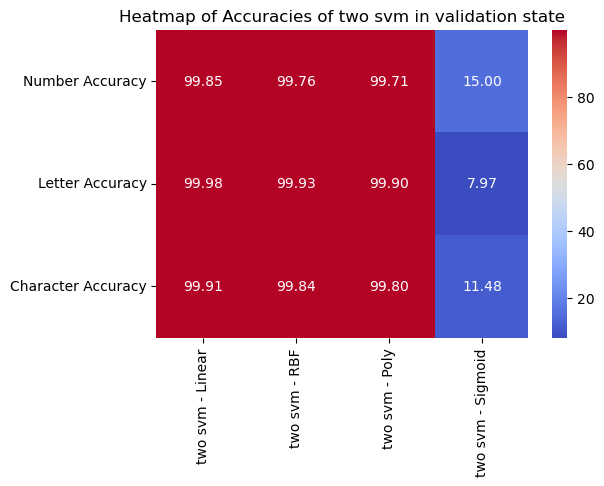

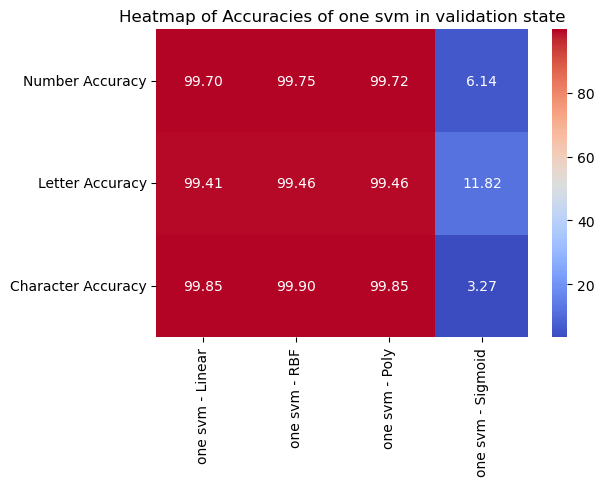

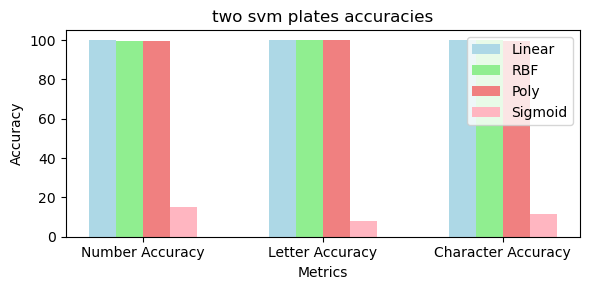

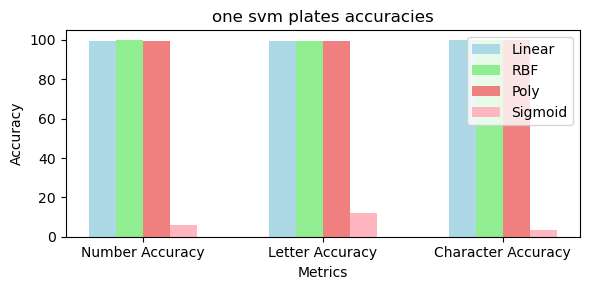

In [7]:
# Model types
models = ["two svm", "one svm"]
# Kernel types
kernels = ['Linear', 'RBF', 'Poly', 'Sigmoid']
# Metrics
metrics = ['Number Accuracy', 'Letter Accuracy', 'Character Accuracy']

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink']

# Accuracy for each kernel in implementation of two SVM VALIDATION
two_svm = {
    'Linear': [99.85, 99.98, 99.91],
    'RBF': [99.76, 99.93, 99.84],
    'Poly': [99.71, 99.90, 99.80],
    'Sigmoid': [15.00, 7.97, 11.48]
}

# Accuracy for each kernel in implementation of one SVM VALIDATION
one_svm = {
    'Linear': [99.70, 99.41, 99.85],
    'RBF': [99.75, 99.46, 99.90],
    'Poly': [99.72, 99.46, 99.85],
    'Sigmoid': [6.14, 11.82, 3.27]
}


#plot_grouped_bar_chart(two_svm, one_svm, metrics, kernels)
plot_heatmap(models[0], two_svm, kernels, metrics)
plot_heatmap(models[1], one_svm, kernels, metrics)

plot_single_model_bar_chart(models[0], two_svm, kernels, metrics, colors)
plot_single_model_bar_chart(models[1], one_svm, kernels, metrics, colors)


## Different plots for the testing

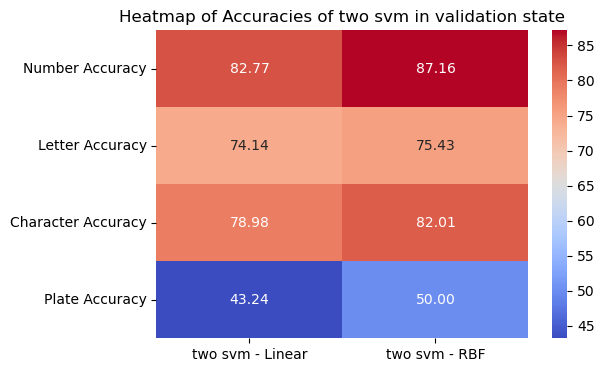

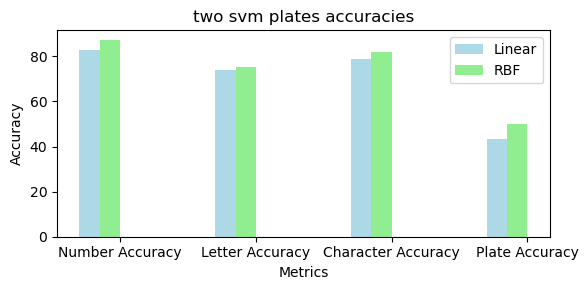

In [8]:
# Model types
models = ["two svm"]
# Kernel types
kernels = ['Linear', 'RBF']
# Metrics
metrics = ['Number Accuracy', 'Letter Accuracy', 'Character Accuracy', "Plate Accuracy"]

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink']

# Accuracy for each kernel in implementation of two SVM VALIDATION
two_svm = {
    'Linear': [82.77, 74.14, 78.98, 43.24],
    'RBF': [87.16, 75.43, 82.01, 50.00],
}


#plot_grouped_bar_chart(two_svm, one_svm, metrics, kernels)
plot_heatmap(models[0], two_svm, kernels, metrics)


plot_single_model_bar_chart(models[0], two_svm, kernels, metrics, colors)